### Differential Equations

An Ordinary Differential Equation (ODE) is an equation involving a function of one independent variable and its derivatives:

$$ \frac{dy}{dx} = f(x, y) $$

##### Example: Solve using Separation of Variables

Consider the ODE:

$$ \frac{dy}{dx} = ky $$

where $ k $ is a constant. To solve, separate variables $ y $ and $ x $:

$$ \frac{1}{y} dy = k dx $$

Integrating both sides:

$$ \int \frac{1}{y} dy = \int k dx $$

which yields:

$$ \ln |y| = kx + C $$

Solving for $ y$:

$$ y = Ae^{kx} $$

where $A = e^C $ is an integration constant.


### Stochastic Differential Equations (SDEs)

A Stochastic Differential Equation (SDE) incorporates randomness into its structure, through Brownian motion, $W_t$. The general form of an SDE is:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t $$

- $X_t$: The stochastic process of interest.
- $\mu(X_t, t)$: The drift term, representing deterministic trends.
- $\sigma(X_t, t)$: The diffusion term, representing random fluctuations.
- $W_t$:  Brownian motion.

### Brownian motion ($W_t$) Properties:

1. $W_0 = 0$: It starts from zero.
2. $W_t$ has independent increments.
3. $W_t - W_s \sim \mathcal{N}(0, t-s)$ for $t > s$: Increments are normally distributed with mean 0 and variance equal to the time elapsed.
4. $W_t$ has continuous paths.

### Example: Geometric Brownian Motion (GBM)

GBM is an SDE used to model stock prices, given by:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

- $S_t$: Stock price at time $t$.
- $\mu$: Expected return rate.
- $\sigma$: Volatility (standard deviation of returns).

Attempting to solve the SDE for Geometric Brownian Motion (GBM) naively:

$$ \frac{dS_t}{S_t} = \mu dt + \sigma dW_t $$

We divide by $S_t$ and integrate both sides from 0 to $T$:

$$ \int_0^T \frac{dS_t}{S_t} = \mu \int_0^T dt + \sigma \int_0^T dW_t $$

This leads to:

$$ \ln\left(\frac{S_T}{S_0}\right) = \mu T + \sigma W_T $$

Solving for $S_T$ gives:

$$ S_T = S_0 e^{\mu T + \sigma W_T} $$

### Critical Mistake:

We assumed $d\ln\left(S_t\right)=\frac{dS_t}{S_t}$, i.e the normal chain rule can apply to stochastic calculus, but this is wrong!



## Ito's lemma

To derive Itô's lemma in a simplified manner, consider an Itô process $X_t$ governed by:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t$$

where $B_t$ is a Wiener process. For a twice-differentiable function $f(t, x)$, the Taylor expansion is:

$$ df = \frac{\partial f}{\partial t} dt + \frac{1}{2} \frac{\partial^2 f}{\partial t^2} dt^2 + \cdots + \frac{\partial f}{\partial x} dx + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} dx^2 + \cdots $$

Substituting $X_t$ for $x$ and $\mu_t dt + \sigma(X_t, t) dW_t$ for $dx$, we get:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} (\mu(X_t, t) dt + \sigma(X_t, t) dW_t) + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} (\mu^2(X_t, t) dt^2 + 2\mu(X_t, t) \sigma(X_t, t) dt dW_t +\sigma^2(X_t, t) dW_t^2) + \cdots $$

As $dt \rightarrow 0$, terms involving $dt^2$ and $dt dW_t$ vanish faster than those involving $dW_t^2$, which scales as $O(dt)$.The equation simplifies to:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$


### Stochastic vs. Deterministic Chain Rule

For a deterministic function $X_t$, applying the chain rule to a twice-differentiable function $f(t, x)$ yields:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} \frac{dX_t}{dt} dt $$

Given a deterministic process $dX_t = \mu(X_t, t) dt +\sigma(X_t, t) dt$, the differential $df$ for $f(t, X_t)$ is:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} \right) dt +\sigma(X_t, t)\frac{\partial f}{\partial x} dt $$


### Stochastic Case with Itô's Lemma

For a stochastic process $X_t$ governed by $dX_t = \mu(X_t, t) dt + \sigma_t dW_t$, Itô's lemma provides the differential $df$:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$

### Contrast and Interpretation

- **Additional Term**: The term $\frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} dt$ in the stochastic case arises from the quadratic variation of the Wiener process, $dW_t^2 = dt$, a property nonexistent in deterministic calculus.





### Correct Solution for GBM using Itô's Lemma

Consider the Geometric Brownian Motion (GBM) described by the SDE:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

Here, $\mu$ represents the constant drift rate, and $\sigma$ represents the constant volatility. The term $S_t$ signifies the stock price at time $t$.

To apply Itô's Lemma, we select a function $f(t, S_t)$ to transform the SDE. Choosing $f(t, S_t) = \ln(S_t)$, we proceed as follows:

#### Step 1: Compute Partial Derivatives of $f$

For $f(t, S_t) = \ln(S_t)$:

- $\frac{\partial f}{\partial t} = 0$ since $f$ does not explicitly depend on $t$.
- $\frac{\partial f}{\partial S_t} = \frac{1}{S_t}$
- $\frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2}$

#### Step 2: Apply Itô's Lemma to $f(t, S_t)$

Itô's Lemma gives:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(S_t, t) \frac{\partial f}{\partial S_t} + \frac{ \sigma^2(S_t, t)}{2} \frac{\partial^2 f}{\partial S_t^2} \right) dt +  \sigma(S_t, t) \frac{\partial f}{\partial S_t} dW_t $$

- Note: In this context, $\mu(S_t, t) = \mu S_t$ and $ \sigma(S_t, t) = \sigma S_t$, reflecting the GBM dynamics.

Substituting the derivatives and terms:

$$ d(\ln(S_t)) = \left( 0 + \mu S_t \cdot \frac{1}{S_t} - \frac{(\sigma S_t)^2}{2} \cdot \frac{1}{S_t^2} \right) dt + \sigma S_t \cdot \frac{1}{S_t} dW_t $$

Simplifying, we get:

$$ d(\ln(S_t)) = \left( \mu - \frac{\sigma^2}{2} \right) dt + \sigma dW_t $$

#### Step 3: Integrate and Solve for $S_T$

Integrating from $0$ to $T$:

$$ \ln\left(\frac{S_T}{S_0}\right) = \left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T $$

Solving for $S_T$:

$$ S_T = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T} $$



### Problem 1:

For each of the following cases, apply Itô's Lemma to find the stochastic differential $dS_t$:

(a) $dS_t = 3S_t^2 dt + 6S_t^3 dW_t.$

(b) $dS_t = \mu S_t dt + \sigma S_t dW_t.$

(c) $dS_t = 2S_t dt + 3S_t^2 dW_t.$

(d) $dS_t = \mu S_t^4 dt + \sigma S_t^2 dW_t.$



### Solution

We have Ito's Lemma: 

$$ df = \left( \frac{\partial f}{\partial t} + \mu(S_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(S_t, t) \frac{\partial f}{\partial x} dW_t $$

so just plug in, compute and simplify.

For (a), $\mu(S_t, t)=3S_t^2$ and $\sigma(S_t, t)= 6S_t^3$, so we have
$$ df = \left( \frac{\partial f}{\partial t} + 3S_t^2 \frac{\partial f}{\partial x} + \frac{(6S_t^3)^2}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + 6S_t^3 \frac{\partial f}{\partial x} dW_t $$

## Problem 2
Find $\int_0^t e^{\sigma W_s - \frac{\sigma^2 s}{2}} \, dW_s. $

## Solution

 To find the integral, we will apply Itô's formula. Let $f(t, W_t) = e^{\sigma W_t - \frac{\sigma^2 t}{2}}$. Applying Itô's formula, we get:
    $$
    df(t, W_t) = \left(\frac{\partial f}{\partial t} + \frac{1}{2}\frac{\partial^2 f}{\partial W_t^2} \right) dt + \frac{\partial f}{\partial W_t} dW_t.
    $$
    We compute the derivatives:
    $$
    \frac{\partial f}{\partial t} = -\frac{\sigma^2}{2}f(t, W_t), \quad \frac{\partial f}{\partial W_t} = \sigma f(t, W_t), \quad \frac{\partial^2 f}{\partial W_t^2} = \sigma^2 f(t, W_t).
    $$
    Substituting these into Itô's formula, we obtain:
    $$
    df(t, W_t) = \left(-\frac{\sigma^2}{2}f(t, W_t) + \frac{1}{2}\sigma^2 f(t, W_t) \right) dt + \sigma f(t, W_t) dW_t .
    $$
    Simplifying, we get:
    $$
    df(t, W_t) = \sigma f(t, W_t) dW_t.
    $$
    Integrating both sides from $0$ to $t$, we find:
    $$
    \int_0^t e^{\sigma W_s - \frac{\sigma^2 s}{2}} \, dW_s = \sigma^{-1}\left(e^{\sigma W_t - \frac{\sigma^2 t}{2}} - 1\right).
    $$

### Problem 3
Suppose that  $dX_t = 3X_t + 2X_t dW_t$ and that today’s price is $X(0) = 50$. Find
(i.e., derive) the PDF for the price of X(1), the price one year from now.

Given the stochastic differential equation (SDE) for a stock price $X_t$ that follows Geometric Brownian Motion (GBM):

$$ dX_t = 3X_t dt + 2X_t dW_t $$

where $dW_t$ represents the increment of a Wiener process.

### Step 1: Identify the Parameters
From the SDE, we identify the drift rate $\mu = 3$ and the volatility $\sigma = 2$.

### Step 2: GBM Solution
The general solution for a GBM SDE $dX_t = \mu X_t dt + \sigma X_t dW_t$ is:

$$ X_t = X_0 e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t} $$

Applying the given parameters:

$$ X_t = 50 e^{(3 - \frac{1}{2} \cdot 2^2)t + 2 W_t} = 50 e^{(3 - 2)t + 2 W_t} $$

### Step 3: Price at $t=1$
To find the price one year from now, set $t=1$:

$$ X_1 = 50 e^{(3 - 2) \cdot 1 + 2 W_1} = 50 e^{1 + 2 W_1} $$

### Step 4: Log-Normal Distribution
Since $X_t$ follows GBM, $X_1$ is log-normally distributed. The logarithm of $X_1$, $\ln(X_1)$, is normally distributed:

$$ \ln(X_1) = \ln(50) + 1 + 2 W_1 $$

Given $W_t \sim N(0, t)$, the mean and variance of $\ln(X_1)$ are:

- Mean: $\ln(50) + 1$
- Variance: $2^2 \cdot 1 = 4$

### Step 5: PDF of $X_1$
The PDF of a log-normal distribution with parameters $\mu$ and $\sigma^2$ is:

$$ f_{X_1}(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}} $$

For $X_1$, $\mu = \ln(50) + 1$ and $\sigma^2 = 4$, so:

$$ f_{X_1}(x) = \frac{1}{x \cdot 2 \sqrt{2\pi}} e^{-\frac{(\ln(x) - (\ln(50) + 1))^2}{2 \cdot 2^2}} $$

### Generalization 
So in general, for a geometric browian motion $$ dX_t = \mu X_t dt + \sigma X_t dW_t, $$ we have  has the distribution of a log-normal pdf with parameters $\mu_1$ and $\sigma^2_1$ at time $T$ given $X(t)$
$$ f_{X_T}(x) = \frac{1}{x \sigma_1 \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu_1)^2}{2\sigma_1^2}} $$

where 
$$\mu_1=\ln[X(t)]+(\mu-\frac{1}{2}\sigma^2)(T-t)$$
and 
$$\sigma_1^2=\sigma^2(T-t)$$

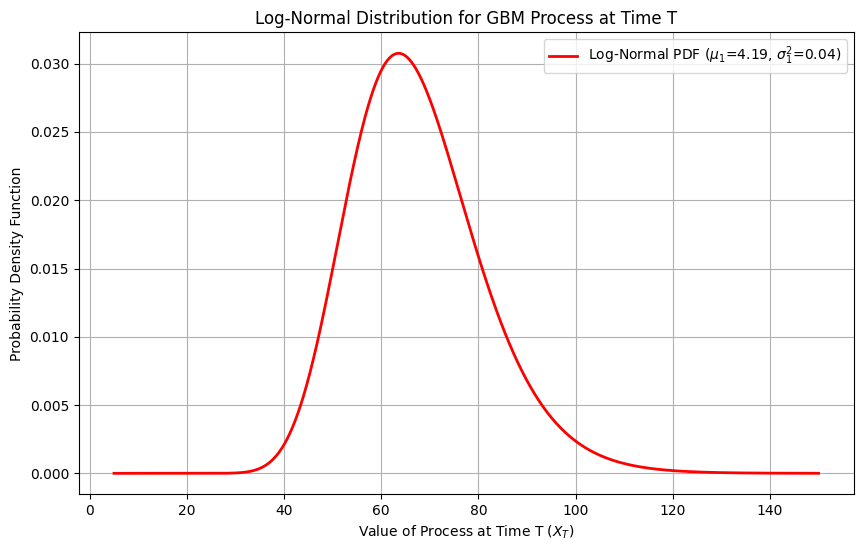

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t):
    """
    Plot the log-normal distribution for a GBM process at time T.

    Parameters:
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between T and t.
    """
    # Calculate mu_1 and sigma_1^2
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)

    # Define the range for x values
    x = np.linspace(X_t * 0.1, X_t * 3, 1000)  # From 10% of X_t to 300% of X_t

    # Calculate the PDF of the log-normal distribution
    pdf = (1 / (x * sigma_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu_1) / sigma_1) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'r-', lw=2, label=f'Log-Normal PDF ($\mu_1$={mu_1:.2f}, $\sigma_1^2$={sigma_1**2:.2f})')
    plt.title('Log-Normal Distribution for GBM Process at Time T')
    plt.xlabel('Value of Process at Time T ($X_T$)')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
X_t = 50  # Value of the process at time t
mu = .3  # Drift coefficient
sigma = .2  # Volatility coefficient
T_minus_t = 1  # One year difference

plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t)

### Problem 4

Find the maximum value of the pdf of the log normal distribution.





#### Solution
To find the mode of a log-normal distribution, we start with the probability density function (PDF) of a log-normally distributed variable $X$:

$$ f_X(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right).$$


### Step 1: Take the Natural Logarithm of the PDF
Taking the logarithm simplifies differentiation. Let $L(x)$ be the natural logarithm of the PDF:

$$ L(x) = \ln(f_X(x)) = -\ln(x \sigma \sqrt{2\pi}) - \frac{(\ln(x) - \mu)^2}{2\sigma^2} $$

### Step 2: Differentiate $L(x)$ with Respect to $x$
Differentiating $L(x)$ gives:

$$ \frac{dL}{dx} = -\frac{1}{x} - \frac{1}{\sigma^2}(\ln(x) - \mu)\frac{1}{x} $$

### Step 3: Set the Derivative Equal to Zero
To find the mode, set $\frac{dL}{dx}$ equal to zero:

$$ -\frac{1}{x} - \frac{1}{\sigma^2}(\ln(x) - \mu)\frac{1}{x} = 0 $$

Simplifying, we get:

$$ -1 - \frac{\ln(x) - \mu}{\sigma^2} = 0 $$

### Step 4: Solve for $x$
Rearranging the equation to solve for $x$:

$$ \ln(x) = \mu - \sigma^2 $$

Taking the exponential of both sides gives the mode of the log-normal distribution:

$$ x = e^{\mu - \sigma^2} $$